# Practise Case 5 & 6

**Supervised Learning (Basic and Advanced) and Unsupervised Learning** <br>
Andreas Nugroho R <br>
11 November 2019

In [1]:
# Import the necessary packages for supervised and unsupervised learning

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import sklearn.metrics as metrics
from mlxtend.classifier import StackingClassifier

# Load data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

display(df_train.head(3))
display(df_test.head(3))

,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,...,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c,att10
0,0.16,0.82,6,202,4,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.43,0.48,2,153,3,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.39,0.54,2,127,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


,att1,att2,att3,att4,att5,att6,att7,att8a,att8b,att8c,att8d,att8e,att8f,att8g,att8h,att8i,att8j,att9a,att9b,att9c
0,0.66,0.62,4,250,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0.66,0.50,4,263,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.32,0.74,3,211,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [3]:
print(df_train.shape)
print(df_test.shape)

(8000, 21)
(2000, 20)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
att1     8000 non-null float64
att2     8000 non-null float64
att3     8000 non-null int64
att4     8000 non-null int64
att5     8000 non-null int64
att6     8000 non-null int64
att7     8000 non-null int64
att8a    8000 non-null int64
att8b    8000 non-null int64
att8c    8000 non-null int64
att8d    8000 non-null int64
att8e    8000 non-null int64
att8f    8000 non-null int64
att8g    8000 non-null int64
att8h    8000 non-null int64
att8i    8000 non-null int64
att8j    8000 non-null int64
att9a    8000 non-null int64
att9b    8000 non-null int64
att9c    8000 non-null int64
att10    8000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 1.3 MB


# Supervised Learning

## Voting

In [5]:
# Converting the dataframe into array
df_train_array = np.asarray(df_train)

In [6]:
# Assigning X and y
X = df_train_array[:,0:19]
y = df_train_array[:,20]

In [7]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
# Create the individual models
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf_dt = DecisionTreeClassifier(random_state=1)
clf_lr = LogisticRegression(random_state=1)

# Create voting classifier
clf_voting = VotingClassifier(estimators=[('knn', clf_knn),
                                            ('dt', clf_dt),
                                            ('lr', clf_lr)])

# Fit it to the training set and predict
clf_voting.fit(X_train, y_train)
y_pred_vote = clf_voting.predict(X_test)

# Get the accuracy and AUC score
acc_vote = accuracy_score(y_test, y_pred_vote)
print("Accuracy of voting model: {:0.3f}".format(acc_vote))
print(metrics.classification_report(y_test, clf_voting.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, clf_voting.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of voting model: {:0.3f}".format(auc_score))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of voting model: 0.967
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1825
         1.0       0.92      0.94      0.93       575

    accuracy                           0.97      2400
   macro avg       0.95      0.96      0.96      2400
weighted avg       0.97      0.97      0.97      2400

AUC score of voting model: 0.959


## K-Nearest Neighbors

In [12]:
# Prepare the X and y data for KNN, decision tree, and logistic regression model
X = df_train_array[:,0:20]
y = df_train_array[:,20]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:
# Fit and predict using KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN model: {:0.3f}".format(acc_knn))
print(metrics.classification_report(y_test, clf_knn.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, clf_knn.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of KNN model: {:0.3f}".format(auc_score))

Accuracy of KNN model: 0.938
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1825
         1.0       0.82      0.94      0.88       575

    accuracy                           0.94      2400
   macro avg       0.90      0.94      0.92      2400
weighted avg       0.94      0.94      0.94      2400

AUC score of KNN model: 0.940


## Decision Tree

In [22]:
# Fit and predict using decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=1)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of decision tree model: {:0.3f}".format(acc_dt))
print(metrics.classification_report(y_test, clf_dt.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, clf_dt.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of decision tree model: {:0.3f}".format(auc_score))

Accuracy of decision tree model: 0.973
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1825
         1.0       0.92      0.97      0.94       575

    accuracy                           0.97      2400
   macro avg       0.96      0.97      0.96      2400
weighted avg       0.97      0.97      0.97      2400

AUC score of decision tree model: 0.970


## Logistic Regression

In [24]:
# Fit and predict using logistic regression classifier
clf_lr = LogisticRegression(random_state=1)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of logistic regression model: {:0.3f}".format(acc_lr))
print(metrics.classification_report(y_test, clf_lr.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, clf_lr.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of logistic regression model: {:0.3f}".format(auc_score))

Accuracy of logistic regression model: 0.792
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1825
         1.0       0.61      0.37      0.46       575

    accuracy                           0.79      2400
   macro avg       0.72      0.65      0.66      2400
weighted avg       0.77      0.79      0.77      2400

AUC score of logistic regression model: 0.646


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Averaging

In [42]:
# Initiate the individual models 
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf_dt = DecisionTreeClassifier(random_state=1)
clf_lr = LogisticRegression(random_state=1)

# Create averaging classifier
clf_averaging = VotingClassifier(estimators=[
                                            ('knn', clf_knn),
                                            ('dt', clf_dt),
                                            ('lr', clf_lr)],
                                voting='soft',
                                weights=[2, 3, 1]
                                )

clf_averaging.fit(X_train, y_train)
y_pred_avg = clf_averaging.predict(X_test)

acc_avg = accuracy_score(y_test, y_pred_avg)
print("Accuracy of averaging model: {:0.3f}".format(acc_avg))
print(metrics.classification_report(y_test, clf_averaging.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, clf_averaging.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of averaging model: {:0.3f}".format(auc_score))

Accuracy of averaging model: 0.973
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1825
         1.0       0.92      0.97      0.94       575

    accuracy                           0.97      2400
   macro avg       0.96      0.97      0.96      2400
weighted avg       0.97      0.97      0.97      2400

AUC score of averaging model: 0.970


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Bagging

In [36]:
# Bagging using decision tree classifier
bagging_dt = BaggingClassifier(DecisionTreeClassifier(random_state=1),
                           max_samples=0.5, max_features=0.5, random_state=1)

bagging_dt.fit(X_train, y_train)
y_pred_bagdt = bagging_dt.predict(X_test)

acc_bagdt = accuracy_score(y_test, y_pred_bagdt)
print("Accuracy of bagging using decision tree model: {:0.3f}".format(acc_bagdt))
print(metrics.classification_report(y_test, bagging_dt.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, bagging_dt.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of bagging using decision tree model: {:0.3f}".format(auc_score))

Accuracy of bagging using decision tree model: 0.964
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1825
         1.0       0.98      0.87      0.92       575

    accuracy                           0.96      2400
   macro avg       0.97      0.93      0.95      2400
weighted avg       0.96      0.96      0.96      2400

AUC score of bagging using decision tree model: 0.931


In [110]:
# using random forest classifier
randomforest = RandomForestClassifier(n_estimators=100, random_state=1)

randomforest.fit(X_train, y_train)
y_pred_rf = randomforest.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest model: {:0.3f}".format(acc_rf))
print(metrics.classification_report(y_test, randomforest.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, randomforest.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of random forest model: {:0.3f}".format(auc_score))

Accuracy of random forest model: 0.989
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1825
         1.0       0.99      0.96      0.98       575

    accuracy                           0.99      2400
   macro avg       0.99      0.98      0.98      2400
weighted avg       0.99      0.99      0.99      2400

AUC score of random forest model: 0.979


## Stacking

In [49]:
# Instantiate the 1st-layer classifiers
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf_dt = DecisionTreeClassifier(random_state=1)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Instantiate the 2nd-layer classifier
clf_lr = LogisticRegression(random_state=1)

# Build the stacking classifier
clf_stack = StackingClassifier(
classifiers=[clf_knn, clf_dt, clf_rf],
meta_classifier=clf_lr,
use_probas=False,
use_features_in_secondary=False)

# Use the fit and predict methods
clf_stack.fit(X_train, y_train)
y_pred_stack = clf_stack.predict(X_test)

acc_stack = accuracy_score(y_test, y_pred_stack)
print("Accuracy of stacking model: {:0.3f}".format(acc_stack))
print(metrics.classification_report(y_test, clf_stack.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, clf_stack.predict(X_test))
auc_score = auc(fpr, tpr)
print("AUC score of stacking model: {:0.3f}".format(auc_score))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of stacking model: 0.988
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1825
         1.0       0.99      0.96      0.98       575

    accuracy                           0.99      2400
   macro avg       0.99      0.98      0.98      2400
weighted avg       0.99      0.99      0.99      2400

AUC score of stacking model: 0.980


## Conclusion

After using voting, averaging, K-Nearest Neighbors, decision tree, logistic regression, bagging using decision tree, random forest, and stacking models it can be observed that the highest AUC score is gained from using the **stacking** model. The stacking model uses KNN, random forest, and decision tree models for teh 1st layer, and logistic regression for the second layer. It achieves an AUC score of **98%**.

# Prediction using stacking model

In [51]:
# Converting the dataframe into array
df_test_array = np.asarray(df_test)

# Assigning X
X_predict = df_test_array[:,0:20]

In [52]:
# Instantiate the 1st-layer classifiers
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf_dt = DecisionTreeClassifier(random_state=1)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Instantiate the 2nd-layer classifier
clf_lr = LogisticRegression(random_state=1)

# Build the Stacking classifier
clf_stack = StackingClassifier(
classifiers=[clf_knn, clf_dt, clf_rf],
meta_classifier=clf_lr,
use_probas=False,
use_features_in_secondary=False)

# Use the fit method to get the model from the train data
clf_stack.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='euclidean',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                                DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurit

In [53]:
# Use the predict method to predict using test.csv
y_predict = clf_stack.predict(X_predict)

In [61]:
y_predict

array([0., 0., 0., ..., 1., 0., 0.])

In [58]:
y_predicted= pd.DataFrame(y_predict)
y_predicted.head()

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [59]:
# Export to csv
y_predicted.to_csv('prediction_test.csv')

# Unsupervised Learning

In [62]:
df_combined = pd.concat([df_train, df_test])[['att1', 'att2']]
df_combined.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,att1,att2
0,0.16,0.82
1,0.43,0.48
2,0.39,0.54
3,0.73,1.00
4,0.44,0.46


In [63]:
df_combined.shape

(10000, 2)

## K-Means Clustering

In [67]:
from sklearn.cluster import KMeans

In [64]:
# Converting X to array
X = np.asarray(df_combined)

Text(0.5, 1.0, 'Scatter Plot')

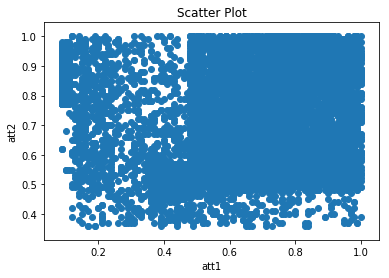

In [65]:
# Createing scatter plot graph to visualize the data
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("att1")
plt.ylabel("att2")
plt.title("Scatter Plot")

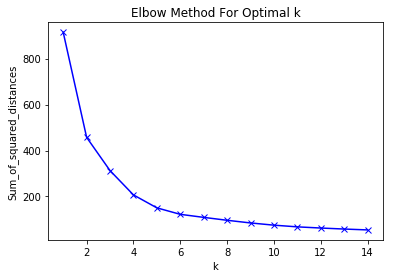

In [68]:
#Scree plot
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [75]:
# Choosing n_clusters based on elbow method
km = KMeans(n_clusters=4, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [76]:
# Showing centroid values
km.cluster_centers_

array([[0.46227511, 0.55252013],
       [0.83486565, 0.61634146],
       [0.16574234, 0.83003142],
       [0.74167777, 0.88220226]])

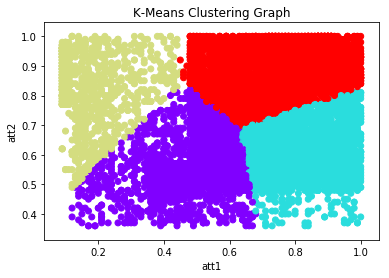

In [106]:
# Visualizing the clusters
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow')
plt.xlabel("att1")

# Plotting the clusters
plt.ylabel('att2')
plt.title('K-Means Clustering Graph')
plt.show()

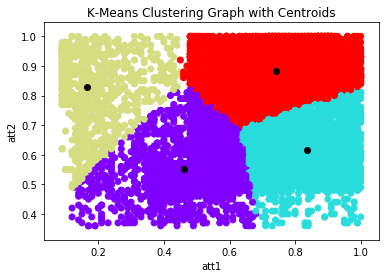

In [107]:
# Showing centroid values inside the graph
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.xlabel("att1")
plt.ylabel("att2")
plt.title("K-Means Clustering Graph with Centroids")
plt.show()

In [78]:
# Inserting the clustering result to a dataframe
df_clustered = pd.DataFrame(X)
df_clustered['KMcluster'] = pd.DataFrame(km.labels_)
df_clustered = df_clustered.sort_values('KMcluster')
df_clustered = np.asarray(df_clustered)

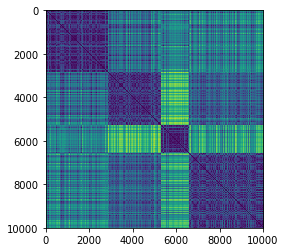

In [79]:
# Create similarity matrix 
from scipy.spatial.distance import cdist
dist = cdist(df_clustered[:,0:2],df_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

There are 4 clusters made using the K-Means method. The red cluster shows employees with the highest satisfaction with their job and also the highest performance evaluation scores. The light blue cluster also shows employees with the highest satisfaction in their job, but their performance is not as highly rated as the red cluster employees. The light green cluster shows employees who are not satisfied with their job but they work really hard. Lastly, the purple cluster employees are those who are least satisfied with their job and also are lowly rated based on their performance.

## Hierarchical Clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

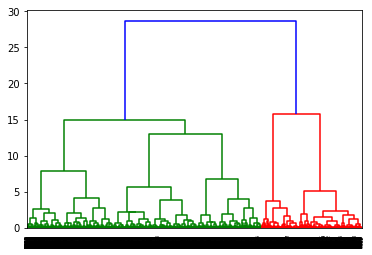

In [82]:
# Creating dendogram using Ward method
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [104]:
# fitting hierarchical clustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
print("Unique labels:", np.unique(model.labels_))

Unique labels: [0 1]


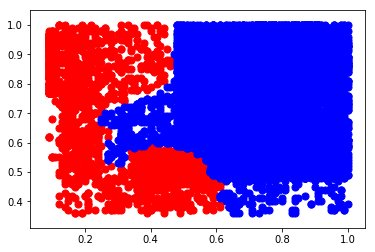

In [84]:
# Plotting data after hierarchical clustering is done
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

There are 2 clusters made using the hierarchical clustering method. The blue one represents employees who are highly satisfied with the job, regardless of their work performance. The red one represents employees who are not as satistfied with their job, also regardless of their work performance. However, there are some blue employees who are less satisfied with their job compared to some of the red employees.

## DBSCAN Clustering

In [85]:
from sklearn.cluster import DBSCAN

In [95]:
# Activate DBSCAN Algorithm
dbscan = DBSCAN(eps=0.05, min_samples=50)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [105]:
# Print the unique labels
print('Unique labels: ', np.unique(dbscan.labels_))

Unique labels:  [-1  0  1]


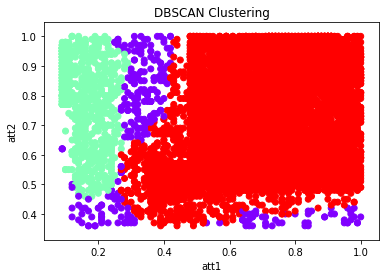

In [97]:
# Visualizing the result
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("att1")
plt.ylabel("att2")
plt.title("DBSCAN Clustering")
plt.show()

Using the DBSCAN method, we have 3 clusters. The red cluster represents employees with the highest satisfaction and also the highest performance in their job. The light green cluster represents employees who are very hard-working but they are not satisfied with their job. The purple cluster on the other hand represents employees who do not belong to either red nor light green cluster. They may be highly satisfied but are not hard-working, or they may not be satisfied and hard-working at all, or they may have medium satisfaction with their job but are very hard-working.